# Hotel Review Classification

### Team 1: Renetta Nelson, Jacqueline Urenda

### June 26, 2023

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv
import time
import random
from collections import OrderedDict
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
import random


py.init_notebook_mode(connected=True)


from nltk.stem import WordNetLemmatizer
from random import randint
from textblob import TextBlob
from time import sleep

color = sns.color_palette()
%matplotlib inline


from collections import Counter, defaultdict
from string import punctuation
from nltk.corpus import stopwords
from nltk.metrics import ConfusionMatrix
import plotly.io as pio

color = sns.color_palette()
%matplotlib inline




In [2]:
#import nltk
#nltk.download('wordnet')

## Retrieving Data from Website

In [3]:


hotel_page1 = ("https://www.tripadvisor.in/Hotels-g60750-San_Diego_California-Hotels.html")
hotel_page2 = ("https://www.tripadvisor.in/Hotels-g60750-oa30-San_Diego_California-Hotels.html")
hotel_page3 = ("https://www.tripadvisor.in/Hotels-g60750-oa60-San_Diego_California-Hotels.html")
hotel_page4 = ("https://www.tripadvisor.in/Hotels-g60750-oa90-San_Diego_California-Hotels.html")
hotel_page5 = ("https://www.tripadvisor.in/Hotels-g60750-oa120-San_Diego_California-Hotels.html")
hotel_page6 = ("https://www.tripadvisor.in/Hotels-g60750-oa150-San_Diego_California-Hotels.html")
hotel_page7 = ("https://www.tripadvisor.in/Hotels-g60750-oa180-San_Diego_California-Hotels.html")
hotel_page8 = ("https://www.tripadvisor.in/Hotels-g60750-oa210-San_Diego_California-Hotels.html")
hotel_page9 = ("https://www.tripadvisor.in/Hotels-g60750-oa240-San_Diego_California-Hotels.html")
hotel_page10 = ("https://www.tripadvisor.in/Hotels-g60750-oa270-San_Diego_California-Hotels.html")

user_agent = ( {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \ AppleWebKit/537.36 (KHTML, like Gecko) \ Chrome/90.0.4430.212 Safari/537.36',
                'Accept-Language': 'en-US, en'})


hp1= requests.get(hotel_page1, headers = user_agent)
hp2= requests.get(hotel_page2, headers = user_agent)
hp3= requests.get(hotel_page3, headers = user_agent)
hp4= requests.get(hotel_page4, headers = user_agent)
hp5= requests.get(hotel_page5, headers = user_agent)
hp6= requests.get(hotel_page6, headers = user_agent)
hp7= requests.get(hotel_page7, headers = user_agent)
hp8= requests.get(hotel_page8, headers = user_agent)
hp9= requests.get(hotel_page9, headers = user_agent)
hp10= requests.get(hotel_page10, headers = user_agent)




## Extracting the Data

In [4]:
def extract(h_page, hotel_names, hotel_ratings, hotel_reviews, hotel_prices):

    h_content = BeautifulSoup(h_page.content, 'html.parser')

    for hotel_name in h_content.find_all('div', {'class': 'listing_title'}):
        hotel_names.append(hotel_name.text.strip())


    for hotel_rating in h_content.find_all('a', {'class': 'ui_bubble_rating'}):
        hotel_ratings.append(hotel_rating['alt'])

    for hotel_review in h_content.find_all('a', {'class': 'review_count'}):
        hotel_reviews.append(hotel_review.text.strip())

    for hotel_price in h_content.find_all('span', {'class': 'fwoto'}):
        print("In pricing")
        hotel_prices.append(hotel_price.span.text.replace('₹','').strip())
    

    return hotel_names, hotel_ratings, hotel_reviews, hotel_prices


def extract_test(hotel_names, hotel_ratings, hotel_reviews, hotel_prices):
    print("Lengths of Dataset Columns")
    print("Hotel Names: ", len(hotel_names))
    print("Hotel Ratings: ", len(hotel_ratings))
    print("Hotel Reviews: ", len(hotel_reviews))
    print("Hotel Prices: ", len(hotel_prices))

In [5]:

hotel_names = []
hotel_ratings = []
hotel_reviews = []
hotel_prices = []


hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp1, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp2, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp3, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp4, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp5, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp6, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp7, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp8, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp9, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp10, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)




In [6]:
extract_test(hotel_names, hotel_ratings, hotel_reviews, hotel_prices)

Lengths of Dataset Columns
Hotel Names:  600
Hotel Ratings:  300
Hotel Reviews:  300
Hotel Prices:  0


## Data Preparation

In [7]:
def processing(hotel_names, hotel_ratings, hotel_reviews):
    hotel_names2 = []
    hotel_names3 = []
    hotel_names4 = []
    hotel_reviews2 = []
    hotel_reviews3 = []
    hotel_ratings2 = []
    hotel_ratings3 = []
    name_index = []
    num = 0
    temp = 0

    # removing duplicates of hotel names
    n = 0
    for i in hotel_names:
        if n % 2 == 0:
            n = n + 1
            hotel_names2.append(i)
        else:
            n = n + 1
            continue 

 

    # remove "Sponsored" hotels

    for i in hotel_names2:
        #print(i)
        x = i.split(" ")
        if x[0] == "Sponsored":
            name_index.append(num)
            num = num + 1
            continue
        else:
            hotel_names3.append(" ".join(x))
            num = num + 1



    # removing numbers from hotel names

    for i in hotel_names3:
        x = i.split(" ")
        del x[0]
        hotel_names4.append(" ".join(x))



    # Removing word "reviews" from column values and converting to numerical 

    for i in hotel_reviews:
        x = i.split(" ")
        for y in x:
            c = re.sub(r'[^\w\s]', '', y)
            if c.isdigit():
                hotel_reviews2.append(c)
            else:
                continue

    hotel_reviews2 = [eval(i) for i in hotel_reviews2]


    # Removing Sponsored hotel reviews



    for i in range(len(hotel_reviews2)):

        if i not in name_index:
                hotel_reviews3.append(hotel_reviews2[i])
        else:
            continue



    # Removing Sponsored hotel ratings

   
    for i in range(len(hotel_ratings)):

        if i not in name_index:
                hotel_ratings2.append(hotel_ratings[i])
        else:
            continue
        


    # Only taking rating and converting into numerical 

    for i in hotel_ratings2:
        x = i.split(" ")
        hotel_ratings3.append(x[0])

    hotel_ratings3 = [eval(i) for i in hotel_ratings3]


    return hotel_names4, hotel_ratings3, hotel_reviews3, name_index



def processing_test(hotel_names3, hotel_ratings2, hotel_reviews2):
    print("Lengths of Dataset Columns")
    print("Hotel Names: ", len(hotel_names3))
    print("Hotel Ratings: ", len(hotel_ratings2))
    print("Hotel Reviews: ", len(hotel_reviews2))


In [8]:

hotel_names4, hotel_ratings3, hotel_reviews3, name_index = processing(hotel_names, hotel_ratings, hotel_reviews)



In [9]:
processing_test(hotel_names4, hotel_ratings3, hotel_reviews3)


Lengths of Dataset Columns
Hotel Names:  300
Hotel Ratings:  300
Hotel Reviews:  300


## Loading Data 

In [10]:

hotels_dict = {}

# Load data into dictionary

hotels_dict = {'names':hotel_names4, 'num_reviews':hotel_reviews3, 'ratings':hotel_ratings3}   #, 'costs':hotel_prices[:37]}


hotels_df = pd.DataFrame.from_dict(hotels_dict)
hotels_df.head(10)


,names,num_reviews,ratings
0,Bahia Resort Hotel,6360,4.5
1,Manchester Grand Hyatt San Diego,12631,4.5
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5
3,San Diego Mission Bay Resort,1357,4.0
4,Catamaran Resort Hotel and Spa,6747,4.5
5,San Diego Marriott La Jolla,1502,4.5
6,Paradise Point Resort & Spa,3189,4.0
7,Best Western Plus Island Palms Hotel & Marina,4852,4.5
8,Old Town Inn,2412,4.5
9,Urban Boutique Hotel,1333,4.5


## Extracting Hotel Reviews

In [11]:
def extract_review(url):
    
    hotel_rev = []
    hotel_rev2 = []
    hotel_rev3 = []

    review_page= (url)

    user_agent = ( {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \ AppleWebKit/537.36 (KHTML, like Gecko) \ Chrome/90.0.4430.212 Safari/537.36',
                    'Accept-Language': 'en-US, en'})


    rp1= requests.get(review_page, headers = user_agent)

    h_content = BeautifulSoup(rp1.content, 'html.parser')


    for rp_1 in h_content.findAll('span', {'class':'QewHA H4 _a'}):
        hotel_rev.append(rp_1.span.text.strip())


    for rp_2 in h_content.findAll('a', {'class':'Qwuub'}):
        hotel_rev2.append(rp_2.text.strip())

    for rp_3 in h_content.findAll("span", {"class": "ui_bubble_rating"}):
        hotel_rev3.append(rp_3)


    return hotel_rev2, hotel_rev3, hotel_rev



def extract_links(hotel_link, links):

    for review in hotel_link.findAll('a',{'class': 'review_count'}):
        a = review['href']
        a = 'https://www.tripadvisor.in'+ a

        a= a[:(a.find('Reviews')+7)] + '-or{}' + a[(a.find('Reviews')+7):]
  
        links.append(a)
    #return links
    





In [12]:

hotel_rev = BeautifulSoup(hp1.content, 'html.parser')
hotel_rev2 = BeautifulSoup(hp2.content, "html.parser")
hotel_rev3 = BeautifulSoup(hp3.content, "html.parser")
hotel_rev4 = BeautifulSoup(hp4.content, "html.parser")
hotel_rev5 = BeautifulSoup(hp5.content, "html.parser")
hotel_rev6 = BeautifulSoup(hp6.content, "html.parser")
hotel_rev7 = BeautifulSoup(hp7.content, "html.parser")
hotel_rev8 = BeautifulSoup(hp8.content, "html.parser")
hotel_rev9 = BeautifulSoup(hp9.content, "html.parser")
hotel_rev10 = BeautifulSoup(hp10.content, "html.parser")


links = []
links2 = []

extract_links(hotel_rev, links)
extract_links(hotel_rev2, links)
extract_links(hotel_rev3, links)
extract_links(hotel_rev4, links)
extract_links(hotel_rev5, links)
extract_links(hotel_rev6, links)
extract_links(hotel_rev7, links)
extract_links(hotel_rev8, links)
extract_links(hotel_rev9, links)
extract_links(hotel_rev10, links)



# removing links to reviews for sponsored hotels


for i in range(len(links)):

    if i not in name_index:
            links2.append(links[i])
    else:
        continue


In [13]:

# Extracting review content from links

reviews = []
rev_dict = {}
rev_title = []
rev_rate = []
rev_summary = []


for link in links2:
    title, rate, summary = extract_review(link)
    rev_title.append(title)
    rev_rate.append(rate)
    rev_summary.append(summary)


In [14]:

# Converting each review rating to numerical

rev_rate2 = []

rev_rate4 = []

for i in rev_rate:
    temp2 = []
    for j in i:
        temp2.append(str(j))
    rev_rate2.append(temp2)
    


for x in rev_rate2:
    temp3 = []
    for y in x:
        #print(y)
        y1 = y.split(" ")
        y2 = y1[2].split('"')
        y3 = y2[0].split("_")
        n = int(y3[1]) / 10
        temp3.append(n)
        #print(y3)
    rev_rate4.append(temp3)

## Loading Review Content into Data Frame

In [15]:

hotels_df["review_title"] = rev_title
hotels_df["review_rating"] = rev_rate4
hotels_df["review_summary"] = rev_summary

hotels_df.head(10)


,names,num_reviews,ratings,review_title,review_rating,review_summary
0,Bahia Resort Hotel,6360,4.5,"[Beautiful Bahia in Sunny San Diego, Outstandi...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[What an amazing experience at the Bahia resor...
1,Manchester Grand Hyatt San Diego,12631,4.5,"[Great Stay, Great Stay Near Convention Center...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Our overall experience is 5 stars. Walking di...
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5,"[Best customer service from Staff Iniego, Abso...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Iniego assisted me he was awesome. Great ser...
3,San Diego Mission Bay Resort,1357,4.0,"[Staycation or Vacation. You decide!, Excellen...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Arrive early for your day and check in. The s...
4,Catamaran Resort Hotel and Spa,6747,4.5,"[Love it!, Phenomenal stay!, Randy at Front De...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[We always have so much fun at this resort. Su...
5,San Diego Marriott La Jolla,1502,4.5,"[Exceptional Dining Experience, Thanks Stephan...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.0, ...",[We always appreciate extraordinary service an...
6,Paradise Point Resort & Spa,3189,4.0,"[Poor customer service, Beautiful!!!!! Would l...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...",[We made a reservation for ocean view but we g...
7,Best Western Plus Island Palms Hotel & Marina,4852,4.5,"[Great location!, Very impressed!, Good stay, ...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, ...",[Very happy with this location. Quiet and peac...
8,Old Town Inn,2412,4.5,"[Not super great, but not entirely bad, Fantas...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",[Booked this for our San Diego trip. The sink ...
9,Urban Boutique Hotel,1333,4.5,"[Highly recommended., Solid stay, Chris is the...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...",[I can't think of anything that wasn't exempla...


## Exploratory Data Analysis

Plotting the distribution of ratings scores:

In [16]:
color = sns.color_palette()
%matplotlib inline
fig = px.histogram(hotels_df, x="ratings",  width=800, height=400)
fig.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig.update_layout(title_text='Hotel Ratings Distribution')
fig.show()

There are less hotels with a ratings score of less than 3. Majority of hotel guests that have written a review have a positive experience. 

## Data Cleaning & Processing

Functions for text cleaning & Tokenization:

In [17]:
#punctuation
punctuation = set(punctuation) 
tw_punct = punctuation - {"#"}

#stopwords and null removal

sw = stopwords.words("english")
sw = sw + ['nan']

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")


# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])    

# Function to remove stop words:

def remove_stop(tokens) :
    

    return[t for t in tokens if t not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    return([item.lower() for item in whitespace_pattern.split(text)])
    

full_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

### Cleaning & tokenizing the text data

In [18]:

hotels_df['title_tokens']= hotels_df['review_title'].apply(prepare, pipeline=full_pipeline)
hotels_df['summary_tokens']= hotels_df['review_summary'].apply(prepare, pipeline=full_pipeline)

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens
0,Bahia Resort Hotel,6360,4.5,"[Beautiful Bahia in Sunny San Diego, Outstandi...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[What an amazing experience at the Bahia resor...,"[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo..."
1,Manchester Grand Hyatt San Diego,12631,4.5,"[Great Stay, Great Stay Near Convention Center...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Our overall experience is 5 stars. Walking di...,"[great, stay, great, stay, near, convention, c...","[overall, experience, 5, stars, walking, dista..."
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5,"[Best customer service from Staff Iniego, Abso...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Iniego assisted me he was awesome. Great ser...,"[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e..."
3,San Diego Mission Bay Resort,1357,4.0,"[Staycation or Vacation. You decide!, Excellen...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Arrive early for your day and check in. The s...,"[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,..."
4,Catamaran Resort Hotel and Spa,6747,4.5,"[Love it!, Phenomenal stay!, Randy at Front De...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[We always have so much fun at this resort. Su...,"[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet..."


### Lemmatization of the text data

In [19]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

hotels_df['title_lemma'] = hotels_df['title_tokens'].apply(lambda x: word_lemmatizer(x))
hotels_df['summary_lemma'] = hotels_df['summary_tokens'].apply(lambda x: word_lemmatizer(x))

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma
0,Bahia Resort Hotel,6360,4.5,"[Beautiful Bahia in Sunny San Diego, Outstandi...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[What an amazing experience at the Bahia resor...,"[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo...","[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo..."
1,Manchester Grand Hyatt San Diego,12631,4.5,"[Great Stay, Great Stay Near Convention Center...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Our overall experience is 5 stars. Walking di...,"[great, stay, great, stay, near, convention, c...","[overall, experience, 5, stars, walking, dista...","[great, stay, great, stay, near, convention, c...","[overall, experience, 5, star, walking, distan..."
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5,"[Best customer service from Staff Iniego, Abso...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Iniego assisted me he was awesome. Great ser...,"[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e...","[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e..."
3,San Diego Mission Bay Resort,1357,4.0,"[Staycation or Vacation. You decide!, Excellen...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Arrive early for your day and check in. The s...,"[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,...","[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,..."
4,Catamaran Resort Hotel and Spa,6747,4.5,"[Love it!, Phenomenal stay!, Randy at Front De...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[We always have so much fun at this resort. Su...,"[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet...","[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet..."


### Descriptive statistics

### Sentiment Analysis

In [20]:
#converting lemmatized data into string

hotels_df['title_lemma_str'] = [' '.join(map(str,l)) for l in hotels_df['title_lemma']]
hotels_df['summary_lemma_str'] = [' '.join(map(str,l)) for l in hotels_df['summary_lemma']]


hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma,title_lemma_str,summary_lemma_str
0,Bahia Resort Hotel,6360,4.5,"[Beautiful Bahia in Sunny San Diego, Outstandi...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[What an amazing experience at the Bahia resor...,"[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo...","[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo...",beautiful bahia sunny san diego outstanding la...,amazing experience bahia resort hotel long tri...
1,Manchester Grand Hyatt San Diego,12631,4.5,"[Great Stay, Great Stay Near Convention Center...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Our overall experience is 5 stars. Walking di...,"[great, stay, great, stay, near, convention, c...","[overall, experience, 5, stars, walking, dista...","[great, stay, great, stay, near, convention, c...","[overall, experience, 5, star, walking, distan...",great stay great stay near convention center b...,overall experience 5 star walking distance dow...
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5,"[Best customer service from Staff Iniego, Abso...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Iniego assisted me he was awesome. Great ser...,"[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e...","[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e...",best customer service staff iniego absolutely ...,iniego assisted awesome great serverhe even br...
3,San Diego Mission Bay Resort,1357,4.0,"[Staycation or Vacation. You decide!, Excellen...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Arrive early for your day and check in. The s...,"[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,...","[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,...",staycation vacation decide excellent start fin...,arrive early day check staff give call room re...
4,Catamaran Resort Hotel and Spa,6747,4.5,"[Love it!, Phenomenal stay!, Randy at Front De...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[We always have so much fun at this resort. Su...,"[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet...","[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet...",love phenomenal stay randy front desk made sta...,always much fun resort super family pet friend...


In [41]:
hotels_df['title_sentiment'] = hotels_df['title_lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
hotels_df['summary_sentiment'] = hotels_df['summary_lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma,title_lemma_str,summary_lemma_str,title_sentiment,summary_sentiment
0,Bahia Resort Hotel,6360,4.5,"[Beautiful Bahia in Sunny San Diego, Outstandi...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[What an amazing experience at the Bahia resor...,"[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo...","[beautiful, bahia, sunny, san, diego, outstand...","[amazing, experience, bahia, resort, hotel, lo...",beautiful bahia sunny san diego outstanding la...,amazing experience bahia resort hotel long tri...,0.435714,0.311219
1,Manchester Grand Hyatt San Diego,12631,4.5,"[Great Stay, Great Stay Near Convention Center...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Our overall experience is 5 stars. Walking di...,"[great, stay, great, stay, near, convention, c...","[overall, experience, 5, stars, walking, dista...","[great, stay, great, stay, near, convention, c...","[overall, experience, 5, star, walking, distan...",great stay great stay near convention center b...,overall experience 5 star walking distance dow...,0.470833,0.441821
2,Embassy Suites by Hilton San Diego Bay Downtown,3437,4.5,"[Best customer service from Staff Iniego, Abso...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[Iniego assisted me he was awesome. Great ser...,"[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e...","[best, customer, service, staff, iniego, absol...","[iniego, assisted, awesome, great, serverhe, e...",best customer service staff iniego absolutely ...,iniego assisted awesome great serverhe even br...,0.710606,0.420711
3,San Diego Mission Bay Resort,1357,4.0,"[Staycation or Vacation. You decide!, Excellen...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Arrive early for your day and check in. The s...,"[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,...","[staycation, vacation, decide, excellent, star...","[arrive, early, day, check, staff, give, call,...",staycation vacation decide excellent start fin...,arrive early day check staff give call room re...,0.491667,0.346883
4,Catamaran Resort Hotel and Spa,6747,4.5,"[Love it!, Phenomenal stay!, Randy at Front De...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[We always have so much fun at this resort. Su...,"[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet...","[love, phenomenal, stay, randy, front, desk, m...","[always, much, fun, resort, super, family, pet...",love phenomenal stay randy front desk made sta...,always much fun resort super family pet friend...,0.448052,0.282974


### Sentiment Distribution Plot

In [22]:
%matplotlib inline
fig2 = px.histogram(hotels_df, x="title_sentiment",  width=800, height=400)
fig2.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig2.update_layout(title_text='Review Title Sentiment Distribution')
fig2.show()

%matplotlib inline
fig3 = px.histogram(hotels_df, x="summary_sentiment",  width=800, height=400)
fig3.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig3.update_layout(title_text='Review Summary Sentiment Distribution')
fig3.show()

Splitting Data Based on Sentiment Value To Look At Word Clouds Based On Sentiment

In [63]:
positive = hotels_df[hotels_df['title_sentiment'] > 0.4]
negative = hotels_df[hotels_df['title_sentiment'] < 0.2]

In [ ]:
#Generating word cloud 

Sentiment distribution looks like normal

### Looking at Words Frequency

Word Cloud for Summary Text:

Currently getting error for wordcloud

In [65]:
words = hotels_df['summary_lemma']
allwords = []
for wordlist in words:
    allwords += wordlist
#print(allwords)

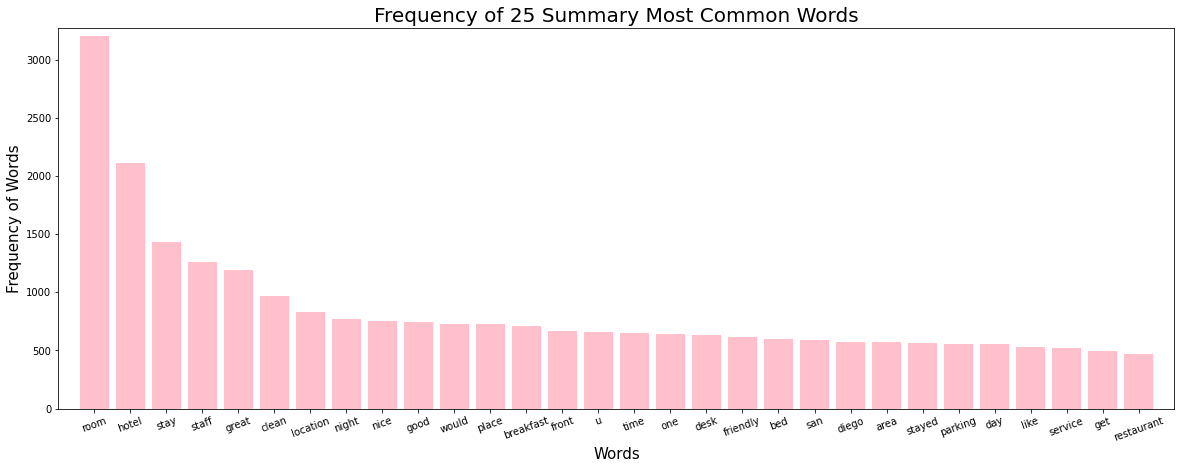

In [66]:
summary_mostcommon_words = FreqDist(allwords).most_common(30)
x, y = zip(*summary_mostcommon_words)

plt.figure(figsize=(20,7))
plt.margins(0.02)
plt.bar(x, y, color = 'pink')
plt.xlabel('Words', fontsize=15)
plt.ylabel('Frequency of Words', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(rotation=20, fontsize=10)
plt.title('Frequency of 25 Summary Most Common Words', fontsize=20)
plt.show()


Most common words seem typical of what's expected for hotel reviews. These words can provide insight into what people value and what contribute to overall hotel stay satisfaction i.e. "staff", "clean", "breakfast". 

### Topic Modeling